<a href="https://colab.research.google.com/github/anmolkumar0717/pyTorch/blob/main/01PyTorch_workFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Python workflow


In [ ]:
what_we_covering={1:"Load a data or prepare",
                  2:"build model",
                  3:"fitting the data to the model",
                  4:"making prediction and evaluating the model(inference)",
                  5:"saving and loading a model",
                  6:"putting all together"}

In [ ]:
import torch
from torch import nn #nn is the building block of the nueral network
import matplotlib.pyplot as plt
torch.__version__


'2.3.0+cu121'

#1... Data (preapearing and loading)

##data can be anything ......

####1.Excel spreadsheet...
####2.videos (yt have a lot of data)
####3.images of any kind
####4.Audios of poadcast
####5.DNA
####6.Text

#machine learning is all about two parts:

####1.Get the data into numerical form
####2.Build the model to learn its pattern in numerical representation


##To showcase it lets create some *known* data using linear regression formula

we use linear regression formula to make a stright line with some known *parameters* data

In [ ]:
#create a *known* parameters

weight=0.7
bias= 0.3

#create

start=0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
Y= weight*X + bias

X[:10],Y[:10],len(X),len(Y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

####Spliting the data into training and test set(one of the most important concept in machine learning)


In [ ]:
#create a training/testing set split
train_split=int(0.8*len(X))
train_split
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

#How might we better visualize our data

here the data explorer's motto comes in!

"Visualize,visualize,visualize!"


what our model does?
* star with random values
* look at the training data and adjust them according to that for better represention to the ideal values

How does we do that?

through two main algorithms:
1.Gradient descent
2.BackPropagation

In [ ]:
def plot_predictions(train_data=X_train,
                     train_lable=Y_train,
                     test_data=X_test,
                     test_lable=Y_test,
                     prediction=None):
  """Plots training data ,test data and compare the predictions.
  """
  plt.figure(figsize=(10,7))

  # plot the traing data in blue
  plt.scatter(train_data,train_lable, c="b",s=4,label="Traing_data")

  # plot the test data in green
  plt.scatter(test_data,test_lable,c="g",s=4,label="Test data")

  #if there are any predection then this runs
  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=4,label="prediction")

  plt.legend(prop={"size":14})

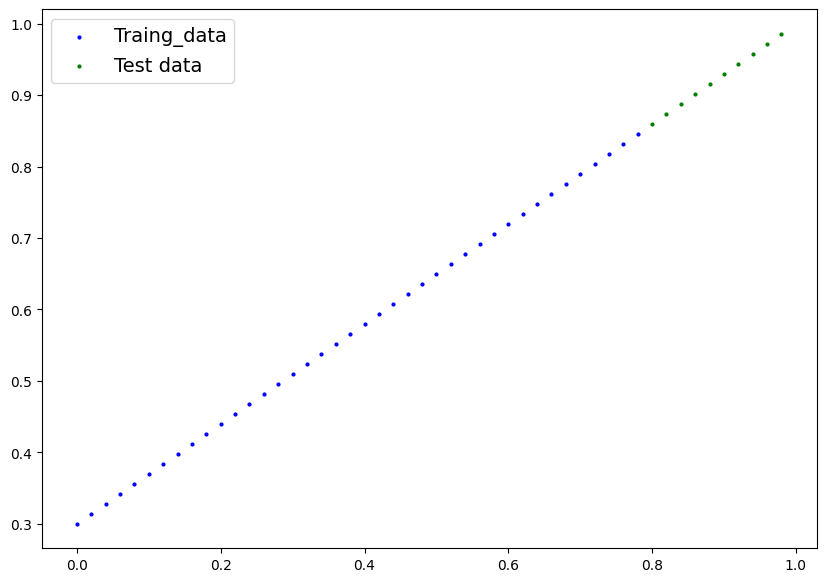

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):     # constructor function to initialize the values.
    super().__init__()    # calling the super class constructor.
    self.weight=nn.Parameter(torch.randn(1,                     # Declearng the parameter for weight
                                         requires_grad=True,
                                         dtype=torch.float))

    self.bias=nn.Parameter(torch.randn(1,                       # Declearng the parameter for bias
                                     requires_grad=True,
                                     dtype=torch.float))
  def forward(self,X:torch.Tensor)->torch.Tensor:               # forward always have to be overrided and to execute this is important
    return self.weight*X + self.bias                            # returning the value of the linear regression function.


In [ ]:
#rendom seed creation
torch.manual_seed(42)

#creating an instance to the class linearregressionkodel

linear_model=LinearRegressionModel()
list(linear_model.parameters())
linear_model.state_dict()               # TO find out what the linear_model contains

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:


# make prediction with the model

with torch.inference_mode():              #it means that it does't track the gradiant function
  Y_pred=linear_model(X_test)

Y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

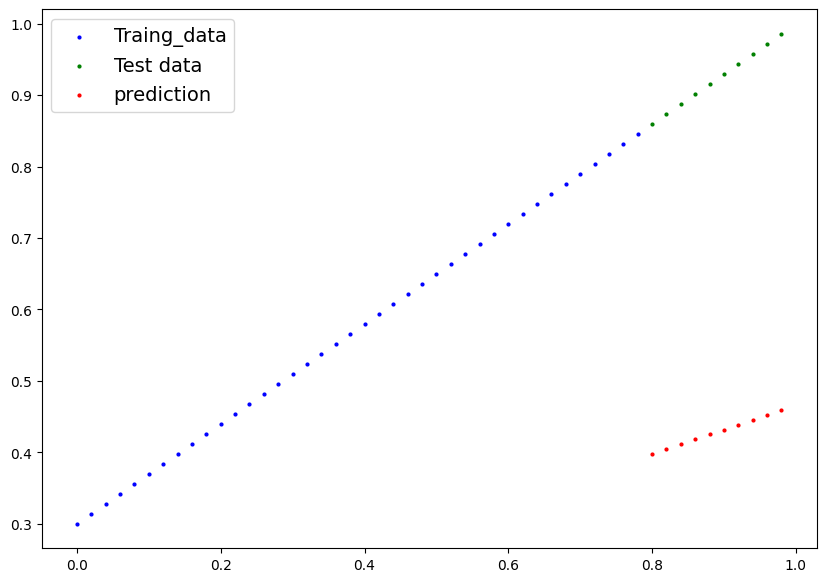

In [ ]:
plot_predictions(prediction=Y_pred)

In [ ]:
Mean_absolute_error=torch.mean(torch.abs(Y_test-Y_pred))
print(Mean_absolute_error)

tensor(0.4945)


In [ ]:
#setting a loss function
loss_fn=nn.L1Loss()


#setting the optimizer

optimizer=torch.optim.SGD(params=linear_model.parameters(),
                          lr=0.01)              #lr =Learning Rate


In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:

torch.manual_seed(42)

#An epoch is one loop through the data
epochs=50

#track different values
epoch_count=[]
train_loss_value=[]
test_loss_values=[]


# 0.Loop Through The data
for epoch in range(epochs):
  linear_model.train()

  #1.Forward
  Y_preds=linear_model(X_train)

  #2.Loss calculation
  loss=loss_fn(Y_preds,Y_train)

  #3.Zero gradiant the optimizer
  optimizer.zero_grad()


  #4.backpropgation
  loss.backward()

  #5.step the optimizer
  optimizer.step()


  ###Testing

  linear_model.eval()     #Sets all parameters require_grad to false  (Dropout/Batchout)
  with torch.inference_mode():
    #1.Forward pass
    test_pred=linear_model(X_test)


    #2.loss function

    test_loss=loss_fn(test_pred,Y_test)


    if epoch %10==0:
      epoch_count.append(epoch)
      train_loss_value.append(loss)
      test_loss_values.append(test_loss)
      print(f"epoch{epoch} | Loss: {loss} | Test_loss:{test_loss}")




epoch0 | Loss: 0.31288138031959534 | Test_loss:0.48106518387794495
epoch10 | Loss: 0.1976713240146637 | Test_loss:0.3463551998138428
epoch20 | Loss: 0.08908725529909134 | Test_loss:0.21729660034179688
epoch30 | Loss: 0.053148526698350906 | Test_loss:0.14464017748832703
epoch40 | Loss: 0.04543796554207802 | Test_loss:0.11360953003168106


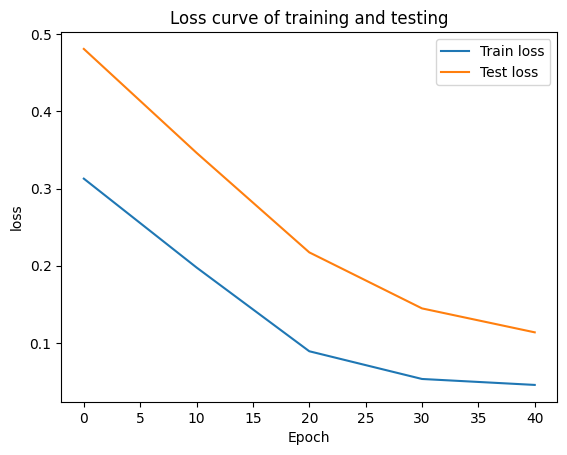

In [ ]:
#plot the loss curve
import numpy as np

plt.plot(epoch_count,np.array(torch.tensor(train_loss_value).numpy()), label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Loss curve of training and testing")
plt.legend()

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


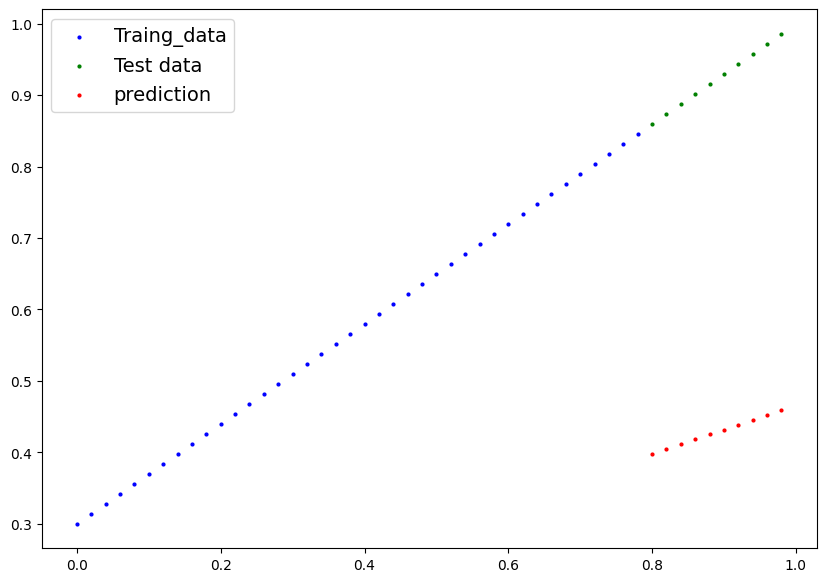

In [ ]:
print(Y_pred)
plot_predictions(prediction =Y_pred)

In [ ]:


with torch.inference_mode():
  Y_preds_new=linear_model(X_test)

print(Y_preds_new)


tensor([[0.7784],
        [0.7883],
        [0.7981],
        [0.8079],
        [0.8178],
        [0.8276],
        [0.8375],
        [0.8473],
        [0.8571],
        [0.8670]])


OrderedDict([('weight', tensor([0.4920])), ('bias', tensor([0.3848]))])


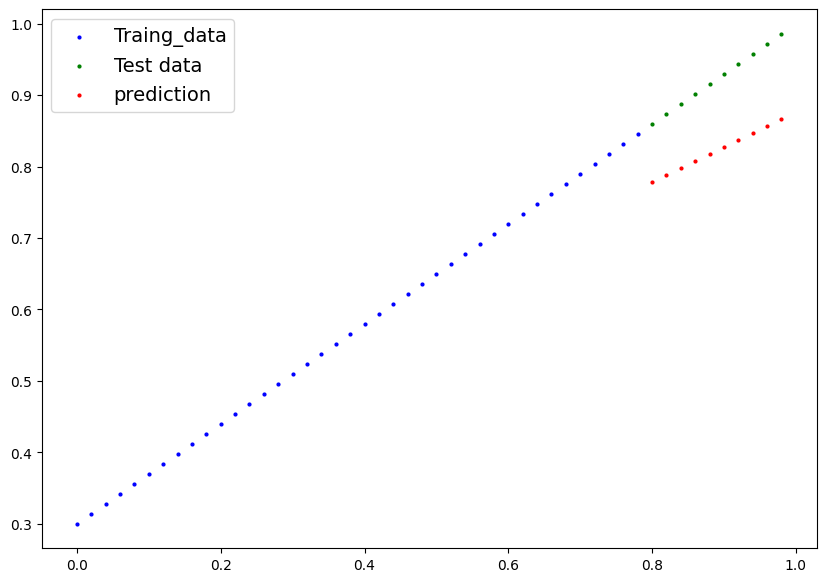

In [ ]:
plot_predictions(prediction=Y_preds_new)


print(linear_model.state_dict())

### saving a model in python


In [ ]:
#saving our pytorch model

from pathlib import Path

#1. Create models directory

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


#2.Create model save path
MODEL_NAME="01_linear_reg.pt"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#3.Save the Model
print(f"Saving the model to{MODEL_SAVE_PATH}")
torch.save(linear_model.state_dict(),MODEL_SAVE_PATH)


Saving the model tomodel/01_linear_reg.pt


In [ ]:
cd ..

/


In [ ]:
ls -l model

total 4
-rw-r--r-- 1 root root 1532 May 28 10:26 01_linear_reg.pt



# loading a pytorch model



In [ ]:
#to load we have to create a new instance if the class

loaded_linear_model=LinearRegressionModel()

loaded_linear_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
#lets predict with our model

loaded_linear_model.eval()
with torch.inference_mode():
  loaded_pred=loaded_linear_model(X_test)

loaded_pred

tensor([[0.7784],
        [0.7883],
        [0.7981],
        [0.8079],
        [0.8178],
        [0.8276],
        [0.8375],
        [0.8473],
        [0.8571],
        [0.8670]])

In [ ]:
linear_model.eval()

with torch.inference_mode():
  Y_pred=linear_model(X_test)



loaded_pred==Y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
loaded=LinearRegressionModel()
Y_p=loaded(X_test)
Y_p==Y_pred

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
# known data
import torch
weight=0.9
bias=0.5

# preparing the Data

start=0
step=0.02
end=1

X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight*X + bias

X,Y


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.5000],
         [0.5180],
         [

In [ ]:
#creating test and training split
import torch.nn as nn
split=int(0.8*len(X))

X_train,Y_train=X[:split],Y[:split]
X_test,Y_test=X[split:],Y[split:]

print(len(X_test),len(Y_test))

10 10


In [ ]:
import matplotlib.pyplot as plt

def plot_pred(train_data=X_train,
              train_label=Y_train,
              test_data=X_test,
              test_label=Y_test,
              prediction =None):
  plt.scatter(train_data,train_label,c="b",s=5,label="Traing_data")

  plt.scatter(test_data,test_label,c="g",s=5,label="Test_data")

  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=5,label="prediction data")


  plt.legend(prop={"size":14})


In [ ]:
loss_fn=nn.L1Loss()    #loss function which is also mse(Mean Absolute Error)
loss_fn

optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

In [ ]:
# using the nn model to create a linear regression without using the nn.parameter

torch.manual_seed(42)

class NewLinearReg(nn.Module):
  def __init__(self):
    super().__init__()
    #using the nn.linear for creating the model parameter
    self.linear_para=nn.Linear(in_features=1,
                               out_features=1)    #1 refers to the one value of X corresponds to the One value of Y

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_para(x)



model_1=NewLinearReg()

model_1,model_1.state_dict()


(NewLinearReg(
   (linear_para): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_para.weight', tensor([[0.7645]])),
              ('linear_para.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to("cuda")
next(model_1.parameters()).device

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
device="cuda"

In [ ]:
X_train=X_train.to(device)
X_test=X_test.to(device)
Y_train=Y_train.to(device)
Y_test=Y_test.to(device)

In [ ]:
loss_fn=nn.L1Loss()    #loss function which is also mse(Mean Absolute Error)
loss_fn

optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

In [ ]:
# creating the trainig and testing loop for the the model


##assigning the value to the epochs
epochs=200

for epoch in range(epochs):
  model_1.train()

  #1.farword pass
  Y_pred=model_1(X_train)

  #2.impelemt the loss function
  loss=loss_fn(Y_pred,Y_train)

  #3.zero_grad
  optimizer.zero_grad()

  #4.Backpropagation
  loss.backward()

  #5.step the model
  optimizer.step()

  #testing loop
  model_1.eval()
  test_res=model_1(X_test)

  #loss calcuation
  test_loss=loss_fn(test_res,Y_test)

In [ ]:
with torch.inference_mode():
  Y_pr=model_1(X_test)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_para.weight', tensor([[0.8981]])),
             ('linear_para.bias', tensor([0.5098]))])

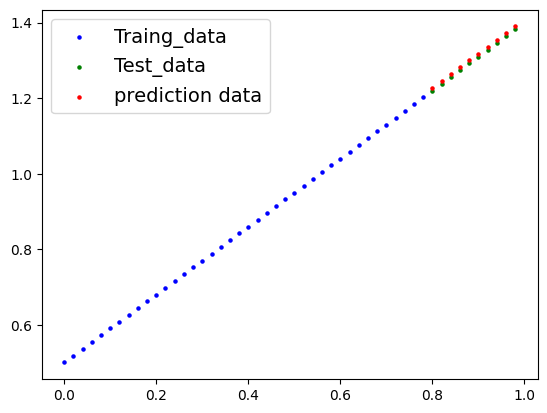

In [ ]:
plot_pred(prediction=Y_pr.cpu())

In [ ]:



#1.Create models directory
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


#2.Create a model save path
MODEL_NAME= "01_workflow.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

#3.Save the Model state dict

print(f"Saving the path to {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(),
           MODEL_SAVE_PATH)

Saving the path to model/01_workflow.pth


In [ ]:
#loading the model

#creating a new instance of linear regression model v2
loaded_model=NewLinearReg()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to("cpu")

NewLinearReg(
  (linear_para): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model.state_dict()

OrderedDict([('linear_para.weight', tensor([[0.8981]])),
             ('linear_para.bias', tensor([0.5098]))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_Ypreds=loaded_model(X_test)


Y_pr==loaded_model_Ypreds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])